## Softmax

In [1]:
import numpy as np

In [19]:
vector = np.array([11231, 999, 123142])

In [28]:
vector = np.array([-10, 10, 24])

In [33]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [32]:
softmax(vector)

array([1.71390701e-15, 8.31528028e-07, 9.99999168e-01])

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

In [1]:
import multiprocessing as mp
import jieba.posseg as psg
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.corpora import WikiCorpus

In [2]:
!pip install hanziconv==0.2.1

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


  HTTP error 502 while getting http://mirrors.aliyun.com/pypi/packages/c5/9e/69e51df581993d41addc41845a6b2b030e0ca3338b5c17d462d968b7aefb/hanziconv-0.2.1.tar.gz#md5=89f595c1ce4217243f4d0c1d0ce0711c (from http://mirrors.aliyun.com/pypi/simple/hanziconv/)
  Could not install requirement hanziconv==0.2.1 from http://mirrors.aliyun.com/pypi/packages/c5/9e/69e51df581993d41addc41845a6b2b030e0ca3338b5c17d462d968b7aefb/hanziconv-0.2.1.tar.gz#md5=89f595c1ce4217243f4d0c1d0ce0711c because of error 502 Server Error: Server or forwarder response invalid for url: http://mirrors.aliyun.com/pypi/packages/c5/9e/69e51df581993d41addc41845a6b2b030e0ca3338b5c17d462d968b7aefb/hanziconv-0.2.1.tar.gz
Could not install requirement hanziconv==0.2.1 from http://mirrors.aliyun.com/pypi/packages/c5/9e/69e51df581993d41addc41845a6b2b030e0ca3338b5c17d462d968b7aefb/hanziconv-0.2.1.tar.gz#md5=89f595c1ce4217243f4d0c1d0ce0711c because of HTTP error 502 Server Error: Server or forwarder response invalid for url: http://mi

In [12]:
from hanziconv import HanziConv

In [13]:
# 结巴分词排除词性
exclude_flags = {'eng', 'x'}
STOP_WORDS = set()

In [14]:
def load_stop_words(stop_words_path):
    """
    加载停用词
    """
    with open(stop_words_path, encoding='utf-8') as f:
        for line in f:
            STOP_WORDS.add(line.strip())


def process_wiki_corpus(path, save_path):
    """
    加载语料库，遍历每篇text，繁体转简体，分词，去停用词，保存到文件
    :param path: 语料库文件路径
    :param save_path: 处理后的文件保存路径
    :return:
    """
    with open(save_path, 'w', encoding='utf-8') as output:
        # 加载wiki语料库
        wiki = WikiCorpus(path, lemmatize=False, dictionary={})
        for text in wiki.get_texts():
            text_words = []
            # 繁体转简体
            sentences_list = [HanziConv.toSimplified(txt) for txt in text]
            for s in sentences_list:
                # 分词，去停用词
                words = [p.word for p in psg.lcut(s) if not any([p.flag.startswith(flag) for flag in exclude_flags])
                         and p.word not in STOP_WORDS]
                if len(words) > 0:
                    text_words += words
            output.write(' '.join(text_words) + '\n')

In [2]:
def preprocess(zhwiki_dump_file, stop_words_file, wiki_corpus):
    print('loading stop words...')
    load_stop_words(stop_words_file)
    print('process corpus...')
    process_wiki_corpus(zhwiki_dump_file, wiki_corpus)


def training_model(wiki_corpus):
    print('training model...')
    model = Word2Vec(LineSentence(wiki_corpus), min_count=5, workers=mp.cpu_count())
    print('vocabulary size', len(model.wv.vocab))
    print('save model...')
    model.save("word2vec.model")
    print('visualize model...')
    tsne_plot(model.wv, 200)

In [15]:
# 维基百科下载的文件
zhwiki_dump_file = 'zhwiki-20190720-pages-articles-multistream.xml.bz2'
# 停用词表
stop_words_file = '停用词.txt'
# 处理之后保存的语料库
wiki_corpus = 'wiki_corpus.txt'

In [ ]:
# 预处理文件，保存为wiki_corpus
preprocess(zhwiki_dump_file, stop_words_file, wiki_corpus)

In [ ]:
# 训练词向量，并保存模型
training_model(wiki_corpus)

In [3]:
# 加载模型
model = Word2Vec.load("word2vec.model")

In [1]:
model.wv.most_similar('明说', topn=50)

NameError: name 'model' is not defined

In [8]:
# 可视化
%matplotlib inline
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [13]:
def tsne_plot(wv, size=None):
    """
    使用TSNE将词向量可视化
    """
    labels = []
    tokens = []

    n = 0
    for word in wv.vocab:
        tokens.append(wv[word])
        labels.append(word)
        n += 1
        if size and n >= size:
            break

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

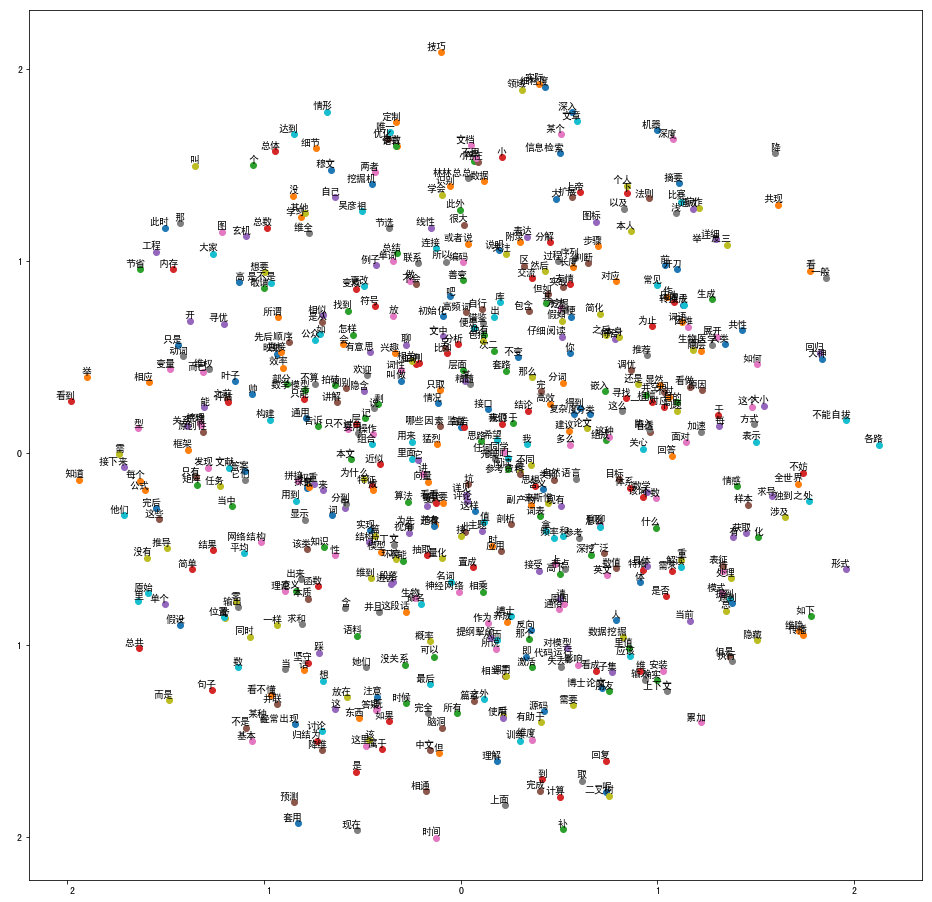

In [12]:
tsne_plot(model.wv, 100)